# BUILDING REGRESSION MODEL 

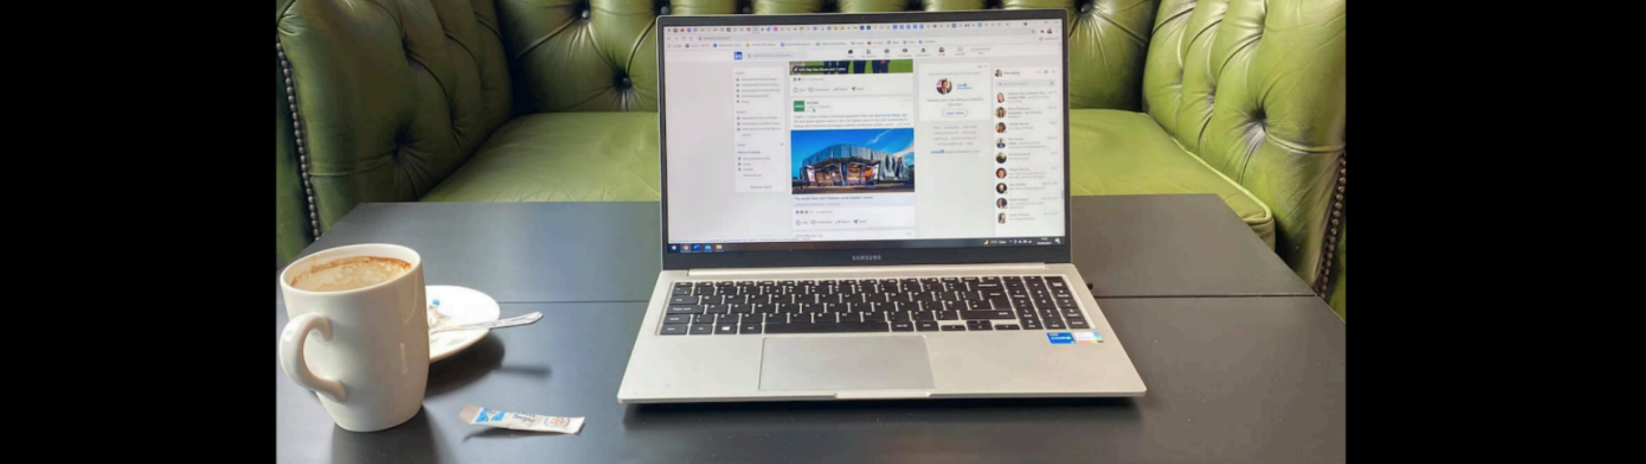

### HEMANT THAPA

### 1. FORMULATION

<div align="center">
    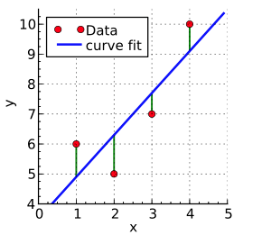
</div>

- In linear regression, the observations (red) are assumed to be the result of random deviations (green) from an underlying relationship (blue) between a dependent variable (y) and an independent variable (x).

- In our given a data set $\{y_{i},x_{i1},\ldots ,x_{ip}\}_{i=1}^{n}$ of $(n)$ statistical units, a linear regression model assumes that the relationship between the dependent variable $(y)$ and the vector of regressors \(x\) is linear. This relationship is modeled through a disturbance term or error variable $(\varepsilon)$ — an unobserved random variable that adds "noise" to the linear relationship between the dependent variable and regressors. Thus, the model takes the form


### $$
y_{i} = \beta_{0} + \beta_{1}x_{i1} + \cdots + \beta_{p}x_{ip} + \varepsilon_{i} = \mathbf{x}_{i}^T\boldsymbol{\beta} + \varepsilon_{i}, \quad i=1,\ldots,n,
$$

Where, $T$ denotes the transpose, so that $(\mathbf{x}_i^T\boldsymbol{\beta})$ is the inner product between vectors $(\mathbf{x}_i)$ and $(\boldsymbol{\beta})$.

Often these \(n\) equations are stacked together and written in matrix notation as

$$
\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\varepsilon}
$$
Where, 

$$
\mathbf{y} = \begin{bmatrix} y_{1} \\ y_{2} \\ \vdots \\ y_{n} \end{bmatrix}
$$

$$
\mathbf{X} = \begin{bmatrix} 1 & x_{11} & \cdots & x_{1p} \\ 1 & x_{21} & \cdots & x_{2p} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n1} & \cdots & x_{np} \end{bmatrix}
$$

$$
\boldsymbol{\beta} = \begin{bmatrix} \beta_{0} \\ \beta_{1} \\ \beta_{2} \\ \vdots \\ \beta_{p} \end{bmatrix}
$$

$$
\boldsymbol{\varepsilon} = \begin{bmatrix} \varepsilon_{1} \\ \varepsilon_{2} \\ \vdots \\ \varepsilon_{n} \end{bmatrix}
$$

### 2. LOADING LIBRARIES

In [5]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
#loading dataset
dataset =pd.read_csv('heart_data.csv')

In [8]:
dataset[:5]

,biking,smoking,heart disease
0,30.801246,10.896608,11.769423
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
4,69.428454,15.974505,4.062224


In [9]:
#checking null values
dataset.isnull().sum()

biking           0
smoking          0
heart disease    0
dtype: int64

In [10]:
#checking datatypes
dataset.dtypes

biking           float64
smoking          float64
heart disease    float64
dtype: object

In [11]:
#Checking shape of dataset
#row and column
dataset.shape

(498, 3)

### 3. MATRIX OPERATIONS

Several important matrix operations are used to find the coefficients that best fit the relationship between the independent variables and the dependent variable.

**1. Matrix Multiplication $(X^{T} X)$**:
   - In linear regression, we often have to calculate the product of the transpose of the design matrix $(X^T)$ and the design matrix itself $(X)$. This operation results in a square matrix.

$$
   X^T X = \begin{bmatrix} x_{11} & x_{12} & \ldots & x_{1p} \\ x_{21} & x_{22} & \ldots & x_{2p} \\ \vdots & \vdots & \ddots & \vdots \\ x_{p1} & x_{p2} & \ldots & x_{pp} \end{bmatrix} \times \begin{bmatrix} x_{11} & x_{21} & \ldots & x_{p1} \\ x_{12} & x_{22} & \ldots & x_{p2} \\ \vdots & \vdots & \ddots & \vdots \\ x_{1p} & x_{2p} & \ldots & x_{pp} \end{bmatrix}
$$


 **2. Matrix Inversion $((X^T X)^{-1})$**:

   - After calculating $(X^T X)$, it's common to compute its inverse, $((X^T X)^{-1})$, which is used to find the coefficient vector $(\beta)$.
   
$$
   (X^T X)^{-1} = \begin{bmatrix} a & b & c \\ d & e & f \\ g & h & i \end{bmatrix}^{-1}
$$

**3. Matrix Multiplication $(X^T Y)$**:
   - This operation involves multiplying the transpose of the design matrix $(X^T)$ by the target vector $(Y)$, yielding a vector of coefficients.

$$
   X^T Y = \begin{bmatrix} x_{11} & x_{21} & \ldots & x_{p1} \\ x_{12} & x_{22} & \ldots & x_{p2} \\ \vdots & \vdots & \ddots & \vdots \\ x_{1p} & x_{2p} & \ldots & x_{pp} \end{bmatrix} \times \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}
$$

**4. Matrix Multiplication $((X^T X)^{-1} \cdot (X^T Y))$**:
   - The final step is to multiply the inverse of $(X^T X)$ by $(X^T Y)$ to obtain the coefficient vector $(\beta)$.

$$
   (X^T X)^{-1} \cdot (X^T Y) = \begin{bmatrix} a & b & c \\ d & e & f \\ g & h & i \end{bmatrix} \cdot \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}
$$

##### NOTATION & TERMINOLOGY 


- **$(\mathbf{y})$** is a vector of observed values $(y_i (i=1,\ldots,n))$ of the variable called the regressand, which is also known as the dependent variable, response variable, target variable, or criterion variable. It can sometimes be referred to as the predicted variable, but that should not be confused with predicted values $((\hat{y}))$.
  
- **$(\mathbf{X})$** may be seen as a matrix of row-vectors or n-dimensional column-vectors known as regressors, exogenous variables, explanatory variables, covariates, input variables, predictor variables, or independent variables. The matrix $(\mathbf{X})$ is sometimes called the design matrix. Typically, a constant is included as one of the regressors.

- **$(\boldsymbol{\beta})$** is a \((p+1)\)-dimensional parameter vector, where $(\beta_0)$ is the intercept term (if included). Its elements are known as effects or regression coefficients. In simple linear regression $((p=1))$, the coefficient is known as the regression slope. Estimation and inference in linear regression primarily focus on $(\boldsymbol{\beta})$.

- **$(\boldsymbol{\varepsilon})$** is a vector of values $(\varepsilon_i)$. This part of the model is called the error term, disturbance term, or noise. It captures all other factors that influence the dependent variable $(y)$ other than the regressors $(x)$.

Fitting a linear model to a given dataset involves estimating the regression coefficients $(\boldsymbol{\beta})$ to minimize the error term $(\boldsymbol{\varepsilon} = \mathbf{y} - \mathbf{X}\boldsymbol{\beta})$. The most common measure of error minimization is the sum of squared errors $((||\boldsymbol{\varepsilon}||_2^2)$.

### 4. FEATURE SELECTION 

In [26]:
#selecting independent and dependent variables
data = {'x': dataset['biking'],
        'y': dataset['heart disease']}

In [27]:
#creating new dataframe
df = pd.DataFrame(data)

In [28]:
df[:5]

,x,y
0,30.801246,11.769423
1,65.129215,2.854081
2,1.959665,17.177803
3,44.800196,6.816647
4,69.428454,4.062224


In [29]:
print(f"X Mean: {sum(df['x'])/len(df['x']):.4f}")
print(f"y Mean: {sum(df['y'])/len(df['y']):.4f}")

X Mean: 37.7884
y Mean: 10.1745


#### 4.1 TOTAL SUM OF SQUARE (SST)

Total Sum of Squares (SST) is a key concept that helps us understand the total variation in the dependent variable ($y$) without considering any explanatory variables. SST is an essential component when calculating the coefficient of determination (R-squared).

- SST quantifies the total variability in the observed values of the dependent variable. It represents how much the actual data points ($y_i$) deviate from the overall mean of the dependent variable ($\bar{y}$).

The formula to calculate SST is as follows:

$$ SST = \sum_{i=1}^n (y_i - \bar{y})^2 $$

Where:
- $ SST $ is the Total Sum of Squares.
- $ y_i $ represents individual observed values of the dependent variable.
- $ \bar{y} $ is the mean (average) of the dependent variable.
- $ n $ is the number of data points.

SST helps provide context for the proportion of the total variability that the regression model explains. It's used in conjunction with the Residual Sum of Squares (SSE) to calculate R-squared ($ R^2 $), a measure of how well the regression model fits the data.

- If $ R^2 $ is close to 1, it indicates that the model explains a significant portion of the total variation in the dependent variable.
- If $ R^2 $ is close to 0, it suggests that the model does not explain much of the total variation, and the regression may not be a good fit for the data.


In [32]:
y_mean = sum(df['y'])/len(df['y'])
x_mean = sum(df['x'])/len(df['x'])

In [33]:
#initialising SST
sst = 0
#for loop for calculating sst
for i in df['y']:
    deviation = i - y_mean
    sst += deviation ** 2

print(f"SST (Sum of Squared Total): {sst}")

SST (Sum of Squared Total): 10388.31134351292


#### 4.2 INTERCEPT & SLOPE

Now, we gonna calculate intercept $(\beta_0 )$ and slope $(\beta_1)$ of a linear regression


### $$\beta_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$$

### $$\beta_0 = \bar{y} - \beta_1 \cdot \bar{x}$$


The intercept ($\beta_0$) and coefficient ($\beta_1$) values play a important role in identifying trends in your data, particularly whether the trend is moving upward or downward. 

1. **Intercept ($\beta_0$):**

   - The intercept is the value of the dependent variable ($y$) when all independent variables are set to zero. It represents the starting point of the trend or the value of $y$ when there's no influence from the independent variables.
   - A positive $\beta_0$ suggests that when all independent variables are zero, the dependent variable starts at a positive value. This indicates an upward trend.
   - A negative $\beta_0$ suggests that when all independent variables are zero, the dependent variable starts at a negative value. This indicates a downward trend.
   - If $\beta_0$ is close to zero, it suggests little to no starting point for the trend, and the dependent variable is near zero when the independent variables are zero.

2. **Coefficient ($\beta_1$):**

   - The coefficient represents the change in the dependent variable ($y$) for a one-unit change in the corresponding independent variable ($x$), assuming all other variables are held constant.
   - A positive $\beta_1$ indicates that an increase in the independent variable is associated with an increase in the dependent variable. This suggests a positive or upward trend.
   - A negative $\beta_1$ indicates that an increase in the independent variable is associated with a decrease in the dependent variable. This suggests a negative or downward trend.
   - The magnitude of $\beta_1$ represents the strength of the relationship. A larger magnitude suggests a stronger influence on the trend.

To identify the overall trend of your data, you can consider both the intercept and coefficient values:

- If the intercept is positive and the coefficient is positive, it indicates an upward trend, where the dependent variable generally increases as the independent variable increases.
- If the intercept is negative and the coefficient is negative, it indicates a downward trend, where the dependent variable generally decreases as the independent variable increases.
- If the intercept and coefficient have opposite signs, the direction of the trend may vary depending on the starting point and the magnitude of the coefficient.


##### Differences from the mean
   - For $x$:
     - $\text{df}['xi - x mean'] = \text{df}['x'] - \bar{x}$
   - For $y$:
     - $\text{df}['yi - y mean'] = \text{df}['y'] - \bar{y}$

##### Product of differences
   - $\text{df}['(xi - x mean)(yi - y mean)'] = \text{df}['xi - x mean'] \cdot \text{df}['yi - y mean']$


##### Square of differences
   - $\text{df}['(xi - x mean){^2}'] = \text{df}['xi - x mean'] \cdot \text{df}['xi - x mean']$

Slope ($\beta_1$):
   - $\beta_1 = \frac{\sum \text{df}['(xi - x mean)(yi - y mean)']}{\sum \text{df}['(xi - x mean){^2}']}$

##### Intercept ($\beta_0$):
   - $\beta_0 = \bar{y} - \beta_1 \cdot \bar{x}$

##### Where:
- $\beta_0$ represents the intercept.
- $\beta_1$ represents the slope.
- $\bar{x}$ and $\bar{y}$ are the mean values of $x$ and $y$ in the dataset, respectively.

In [45]:
#calculating differences from the mean
df['xi - x mean'] = df['x'] - x_mean
df['yi - y mean'] = df['y'] - y_mean
#calculating sums of squares
df['(xi - x mean)(yi - y mean)'] = df['xi - x mean'] * df['yi - y mean']
df['(xi - x mean)**2'] = df['xi - x mean'] * df['xi - x mean']

In [46]:
df[:5]

,x,y,xi - x mean,yi - y mean,(xi - x mean)(yi - y mean),(xi - x mean)**2
0,30.801246,11.769423,-6.987165,1.594885,-11.143723,48.820478
1,65.129215,2.854081,27.340804,-7.320457,-200.147170,747.519574
2,1.959665,17.177803,-35.828746,7.003265,-250.918221,1283.699072
3,44.800196,6.816647,7.011785,-3.357891,-23.544810,49.165124
4,69.428454,4.062224,31.640043,-6.112315,-193.393893,1001.092303


In [47]:
#slope coefficient (beta0) using the formula
beta0 = sum(df['(xi - x mean)(yi - y mean)']) / sum(df['(xi - x mean)**2'])
#intercept coefficient (beta1) using the formula
beta1 = y_mean - beta0 * x_mean

In [48]:
print(f"Coefficient beta0 (slope): {beta0:.4f}")
print(f"Coefficient beta1 (intercept): {beta1:.4f}")

Coefficient beta0 (slope): -0.1991
Coefficient beta1 (intercept): 17.6979


#### VALIDATING SLOPE & INTERCEPT USING SKLEARN 

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [51]:
X = df['x'].values.reshape(-1,1)
y = df['y'].values.reshape(-1,1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
model = LinearRegression().fit(X_train,y_train)

In [54]:
print(f"Coefficient sklearn (slope): {model.coef_[0][0]:.4f}")
print(f"Coefficient sklearn (intercept): {model.intercept_[0]:.4f}")

Coefficient sklearn (slope): -0.1984
Coefficient sklearn (intercept): 17.6049


#### 4.3 PREDICTIONS 

Predictions are made to estimate the value of the dependent variable ($y$) based on the values of the independent variable(s) ($x$).

$ \hat{y} = \beta_0 + \beta_1x $

Where:
- $\hat{y}$ represents the predicted value of the dependent variable ($y$).
- $\beta_0$ is the intercept.
- $\beta_1$ is the slope.
- $x$ is the independent variable for which you want to make a prediction.

Components of the formula mean:
- $\hat{y}$: This is the predicted value of the dependent variable, which the model estimates based on the given independent variable value.
- $\beta_0$: This is the intercept, representing the value of $\hat{y}$ when the independent variable ($x$) is zero. It sets the starting point of the linear relationship.
- $\beta_1$: This is the slope, indicating how the dependent variable ($y$) changes for a one-unit change in the independent variable ($x$). It defines the steepness of the linear relationship.
- $x$: This is the value of the independent variable for which you want to make a prediction. It can be a single value or a set of values.

In [57]:
#initialise an empty list to store predicted 'y' values
predicted_values = [] 
#predicted 'y' values using the regression equation for each 'x' value
for i in df['x']:
    y = beta1 + beta0 * i
    predicted_values.append(y)

In [58]:
#creating prediction columns
df['Prediction'] = predicted_values

In [59]:
df[:5]

,x,y,xi - x mean,yi - y mean,(xi - x mean)(yi - y mean),(xi - x mean)**2,Prediction
0,30.801246,11.769423,-6.987165,1.594885,-11.143723,48.820478,11.565622
1,65.129215,2.854081,27.340804,-7.320457,-200.147170,747.519574,4.731220
2,1.959665,17.177803,-35.828746,7.003265,-250.918221,1283.699072,17.307732
3,44.800196,6.816647,7.011785,-3.357891,-23.544810,49.165124,8.778552
4,69.428454,4.062224,31.640043,-6.112315,-193.393893,1001.092303,3.875279


#### 4.4 RESIDUAL 

Residuals in the context of linear regression are the differences between the observed (actual) values and the predicted values for each data point in your dataset. 
They provide insight into how well the linear regression model fits the data.

1. **Observed Values ($y_i$):** These are the actual values of the dependent variable for each data point in your dataset. They represent what you have measured or observed in the real world.

2. **Predicted Values ($\hat{y}_i$):** These are the values that your linear regression model predicts for the same data points. The model uses the independent variable(s) and the estimated coefficients to make these predictions.

3. **Residuals ($e_i$):** Residuals are calculated by subtracting the predicted values from the observed values for each data point. The formula for calculating a residual is:

   $ e_i = y_i - \hat{y}_i $

4. **Interpretation:** Residuals indicate how much the model's predictions differ from the actual values. A positive residual ($e_i > 0$) means the model underpredicted, while a negative residual ($e_i < 0$) means the model overpredicted. A residual of zero ($e_i = 0$) indicates that the model's prediction perfectly matches the observed value.

5. **Residual Analysis:** Analysing the distribution of residuals is essential for assessing the goodness of fit of the regression model. In a well-fitting model, residuals should be random, with no discernible patterns. Patterns or trends in the residuals may suggest that the model is missing important variables or that the linear assumption is not valid.

6. **Use of Residuals:** Residuals are often used to check the assumptions of linear regression, identify outliers, and refine models. They can also be used for diagnostic purposes and to evaluate the accuracy and reliability of the regression model.

In [62]:
#residuals by subtracting predicted 'y' values from actual 'y' values and store them in a new column 'Residual'
df['Residual'] = df['y'] - df['Prediction']

In [63]:
df[:5]

,x,y,xi - x mean,yi - y mean,(xi - x mean)(yi - y mean),(xi - x mean)**2,Prediction,Residual
0,30.801246,11.769423,-6.987165,1.594885,-11.143723,48.820478,11.565622,0.203800
1,65.129215,2.854081,27.340804,-7.320457,-200.147170,747.519574,4.731220,-1.877139
2,1.959665,17.177803,-35.828746,7.003265,-250.918221,1283.699072,17.307732,-0.129929
3,44.800196,6.816647,7.011785,-3.357891,-23.544810,49.165124,8.778552,-1.961905
4,69.428454,4.062224,31.640043,-6.112315,-193.393893,1001.092303,3.875279,0.186945


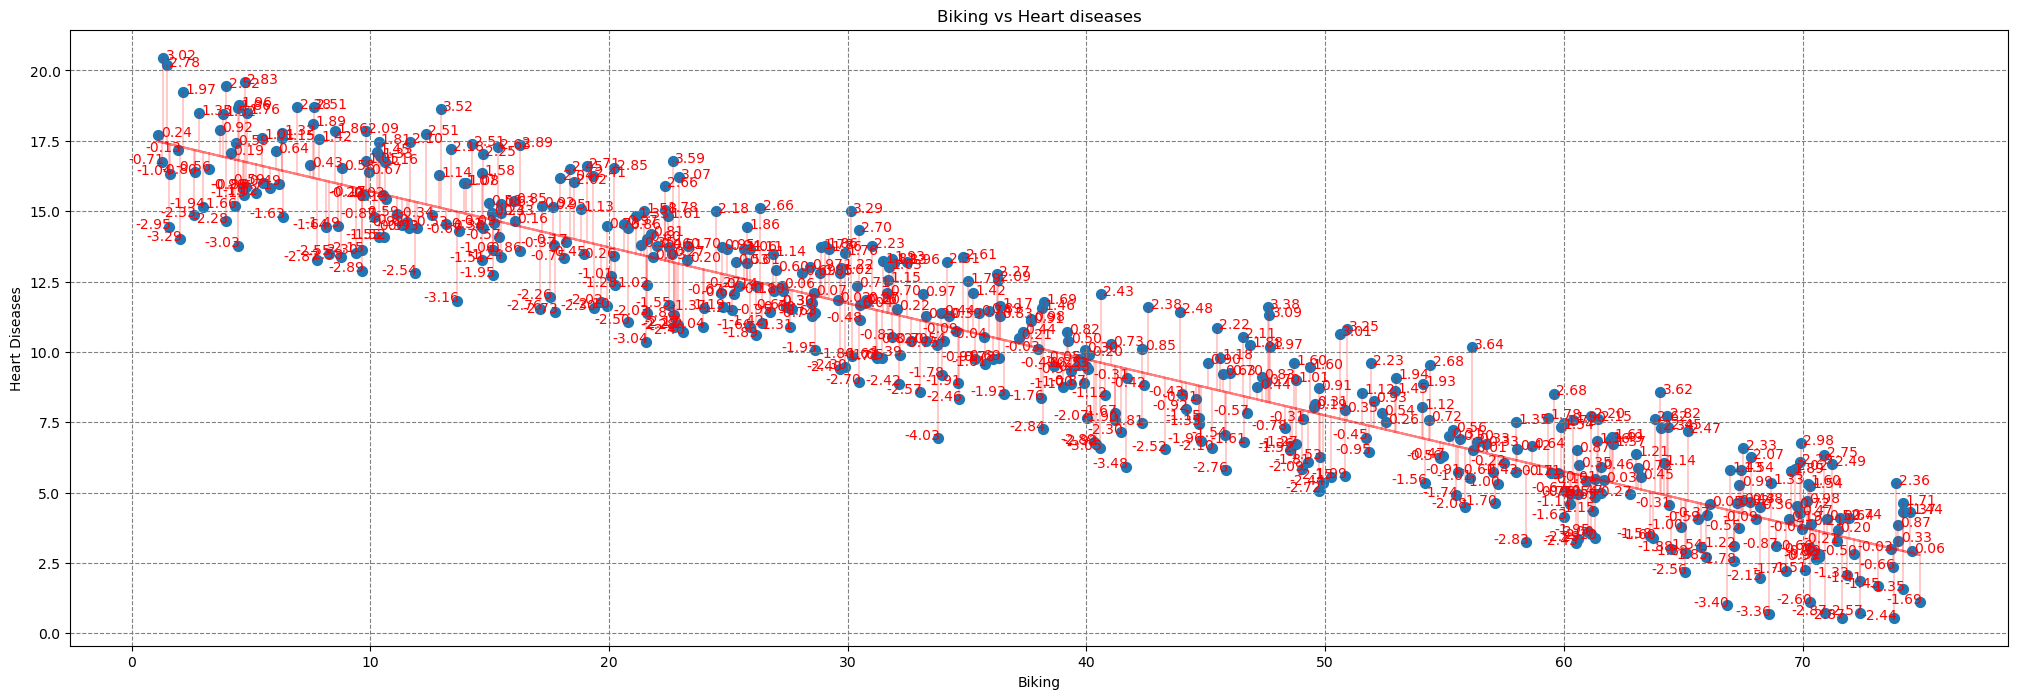

In [64]:
plt.figure(figsize=(25,8))
plt.scatter(df['x'], df['y'], s=50)
plt.plot(df['x'], df['Prediction'], color="red", alpha=0.5)
plt.grid(True, linestyle="--", color="grey")
for i in range(len(df['x'])):
    x = df['x'].values[i]
    y = df['y'].values[i]
    error = y - df['Prediction'].values[i]
    align = 'left' if error > 0 else 'right'
    plt.plot([x, x], [y, df['Prediction'].values[i]], '-', color='red', alpha=0.2)
    plt.text(x+0.1, y+0.1, f'{error:.2f}', color='red', fontsize=10, ha=align, va='center')
plt.title('Biking vs Heart diseases')
plt.xlabel('Biking')
plt.ylabel('Heart Diseases')
plt.show()

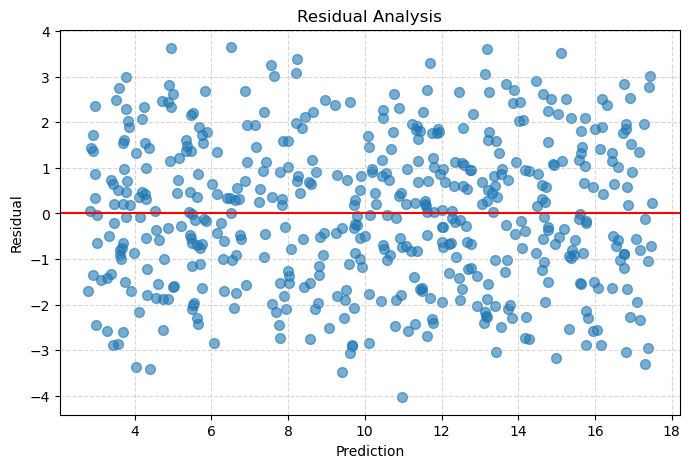

In [65]:
plt.figure(figsize=(8,5))
plt.scatter(df['Prediction'], df['Residual'], alpha=0.6, s=50)
plt.title('Residual Analysis')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.axhline(0, color='red')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

In [66]:
import statsmodels.api as sm
import scipy.stats as stats

In [67]:
#residuals 
residuals = df['Residual']  

In [68]:
#normal distribution to the residuals
mu, std = stats.norm.fit(residuals)

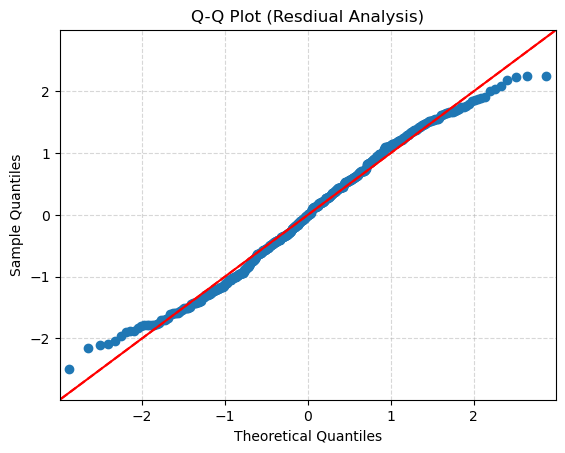

In [69]:
#Q-Q plot
fig = sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot (Resdiual Analysis)')
plt.plot([np.min(residuals), np.max(residuals)], [np.min(residuals), np.max(residuals)], color='red', linestyle='--')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

#### 4.5 SUM OF SQUARE OF RESIDUAL (SSE)

Sum of Squares of Residuals (SSE) is a fundamental concept used to assess the goodness of fit of the regression model. It quantifies the overall variation or "error" in the observed values of the dependent variable ($y$) that is not explained by the model.

- SSE represents the sum of the squared differences between the actual observed values ($y_i$) and the predicted values ($\hat{y}_i$) as estimated by the linear regression model.

The formula to calculate SSE is as follows:

$$ SSE = \sum_{i=1}^n (y_i - \hat{y}_i)^2 $$

Where:
- $ SSE $ is the Sum of Squares of Residuals.
- $ y_i $ represents individual observed values of the dependent variable.
- $ \hat{y}_i $ represents the predicted values of the dependent variable as estimated by the regression model.
- $ n $ is the number of data points.

Key points regarding SSE:

- A smaller SSE value indicates that the model's predictions are closer to the actual data points, suggesting a better fit.
- A larger SSE value indicates that the model's predictions are further from the actual data points, suggesting a poorer fit.
- SSE is used to calculate the coefficient of determination (R-squared), which measures the proportion of the total variation in the dependent variable that is explained by the model.
- The formula for R-squared is $ R^2 = 1 - \frac{SSE}{SST} $, where SST is the Total Sum of Squares.
- An R-squared value close to 1 indicates a good fit, as it suggests that the model explains a significant portion of the total variation.
- An R-squared value close to 0 suggests that the model explains very little of the total variation, indicating a poor fit.


In [72]:
#Sum of Squares of Residual Error (SSE) using the 'Residual' column
sse = sum((df['Residual']) * df['Residual'])
print(f'Sum of Square Residual Error: {sse:.4f}')

Sum of Square Residual Error: 1297.7396


#### 4.6 SUM OF SQUARE REGRESSION (SSR)

Sum of Squares of Regression (SSR) is a crucial concept that quantifies the portion of the total variation in the dependent variable ($y$) that is explained by the regression model. SSR represents the variability in the predicted values due to the influence of the independent variables.

- SSR measures the sum of the squared differences between the predicted values ($\hat{y}_i$) and the overall mean of the dependent variable ($\bar{y}$). It reflects how much the regression model has reduced the unexplained variation in the data.

The formula to calculate SSR is as follows:

$ SSR = \sum_{i=1}^n (\hat{y}_i - \bar{y})^2 $

Where:
- $ SSR $ is the Sum of Squares of Regression.
- $ \hat{y}_i $ represents the predicted values of the dependent variable as estimated by the regression model.
- $ \bar{y} $ is the mean (average) of the dependent variable.
- $ n $ is the number of data points.

Key points regarding SSR:

- A larger SSR value indicates that the regression model explains a significant portion of the total variation in the dependent variable, suggesting a good fit.
- A smaller SSR value suggests that the model explains less of the total variation, indicating a poorer fit.
- SSR is one of the components used to calculate the coefficient of determination (R-squared), a measure of how well the regression model fits the data. 
- The formula for R-squared is $ R^2 = \frac{SSR}{SST} $, where SST is the Total Sum of Squares.
- A higher R-squared value indicates that a larger proportion of the total variation is explained by the model.
- SSR is essential for understanding the contribution of the independent variables in explaining the variation in the dependent variable.


In [75]:
#squared difference between predicted 'y' values and the mean of 'y'
df['(y pred - y mean)**2'] = (df['Prediction'] - y_mean)**2

In [76]:
#Sum of Squares of Regression (SSR) using the predicted values and the mean of 'y'
ssr = sum(df['(y pred - y mean)**2'])
print(f'Total Sum of Square Regression: {ssr:.4f}')

Total Sum of Square Regression: 9090.5717


#### 4.7 BEST FIT LINE

##### Its purpose is to find the line that minimizes the difference between the predicted values (on the line) and the actual data points.

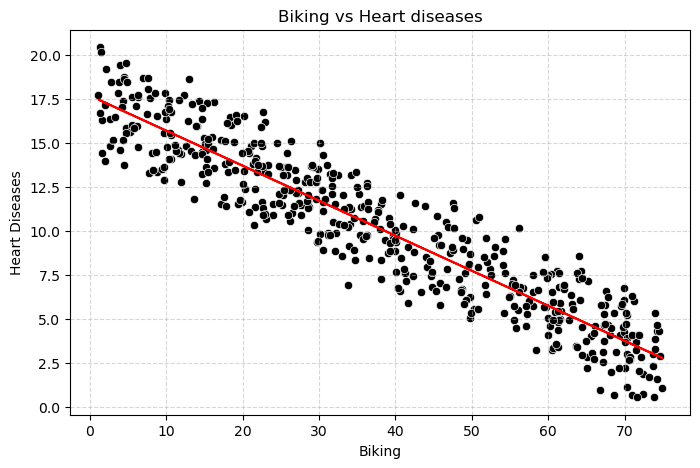

In [79]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='x', y='y', color='black')
plt.plot(df['x'], df['Prediction'], color='red')
plt.xlabel('Biking')
plt.ylabel('Heart Diseases')
plt.title('Biking vs Heart diseases')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

##### Now, we gonna use sklearn to predict best fit line and we will compare to our plot. 

In [81]:
y_pred = model.predict(X_test)

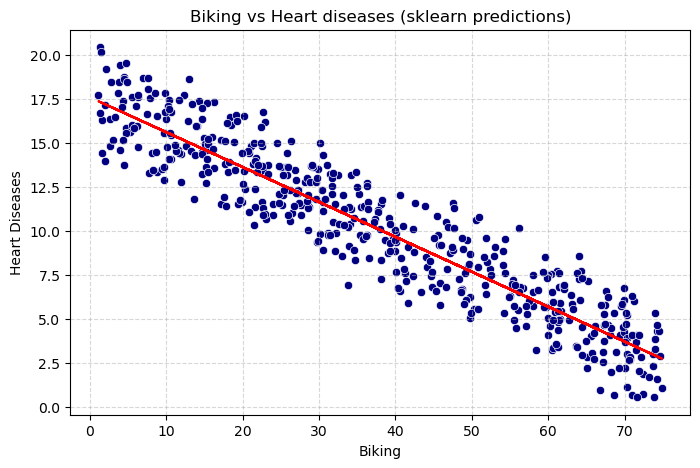

In [82]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='x', y='y', color='navy')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Biking')
plt.ylabel('Heart Diseases')
plt.title('Biking vs Heart diseases (sklearn predictions)')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

##### Now, we can see our plot is identical and good level of estimation. 

#### 4.8 R-SQUARE (R²)

R-squared (R²) is a widely used statistical measure that provides valuable insights into the goodness of fit of the regression model. R² is also known as the coefficient of determination, and it quantifies the proportion of the total variation in the dependent variable that is explained by the model.

- R² ranges from 0 to 1 and is often expressed as a percentage (0% to 100%). It serves as a measure of how well the independent variables in the regression model account for the variation in the dependent variable.


$$ R^2 = \frac{SSR}{SST} $$

$$ R^2 = 1 - \frac{SSE}{SST} $$

Where:
- $ R^2 $ is the R-squared value.
- $ SSR $ is the Sum of Squares of Regression, which measures the variation in the predicted values due to the model.
- $ SSE $ is the Sum of Squares of Residuals, which measures the unexplained variation in the dependent variable.
- $ SST $ is the Total Sum of Squares, which represents the total variation in the dependent variable.

Key points regarding R²:

- An R² value close to 1 indicates that the regression model explains a significant portion of the total variation in the dependent variable. In other words, the model is a good fit for the data.
- An R² value close to 0 suggests that the model explains very little of the total variation, indicating a poor fit.
- R² can be interpreted as the proportion of the dependent variable's variation that is accounted for by the independent variables. For example, an R² of 0.75 means that 75% of the variability in the dependent variable is explained by the model.
- R² is often used for model comparison. A model with a higher R² is generally preferred, as it explains a larger portion of the variation.
- While R² is informative, it does not indicate the direction or strength of the relationships between variables. It's possible to have a high R² even when the relationships are weak, so it should be used in conjunction with other statistical measures for a comprehensive assessment.


In [91]:
r_square = ssr/sst
f"R square: {r_square:.2f}"

'R square: 0.88'

In [92]:
r_square = 1 - sse/sst
f"R square: {r_square:.2f}"

'R square: 0.88'

##### R-squared (R²) is a measure of how well the independent variables explain the variance in the dependent variable. It is typically interpreted on a scale from 0 to 1:

- **0: No Explained Variation:** An R-squared value of 0 indicates that the model does not explain any of the variation in the dependent variable. This means the model provides no information about the outcome.

- **0.01 to 0.09: Weak Relationship:** R-squared values in this range suggest a weak relationship between the independent and dependent variables, and the model explains very little of the variance.

- **0.1 to 0.29: Low Relationship:** R-squared values in this range indicate a low level of relationship. The model explains a small portion of the variance in the dependent variable.

- **0.3 to 0.49: Moderate Relationship:** An R-squared value between 0.3 and 0.49 signifies a moderate relationship. The model explains a moderate amount of the variance in the dependent variable.

- **0.5 to 0.69: Moderate to Strong Relationship:** R-squared values in this range indicate a moderate to strong relationship. The model explains a substantial portion of the variance in the dependent variable.

- **0.7 to 0.89: Strong Relationship:** R-squared values between 0.7 and 0.89 suggest a strong relationship. The model explains a significant portion of the variance in the dependent variable.

- **0.9 to 0.99: Very Strong Relationship:** An R-squared value in this range signifies a very strong relationship. The model explains a vast majority of the variance in the dependent variable.

- **1: Perfect Relationship:** An R-squared value of 1 indicates a perfect relationship, where the model perfectly predicts the dependent variable.


##### VALIDATION OF R SQAURE USING SKLEARN

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
r_square = r2_score(y_test, y_pred)
print(f'R square (sklearn): {r_square:.2f}')

R square (sklearn): 0.88


##### Now, we can see our R sqaure is same. which identity that 0.88 means that 88% of the variability in the dependent variable is explained by the model.

#### MEAN SQUARE ERROR & ROOT MEAN SQUARE ERROR

Mean Square Error (MSE) and Root Mean Square Error (RMSE) are two important metrics used to evaluate the performance and accuracy of a regression model in predicting values. These metrics quantify the errors or differences between predicted values and actual observed values.

1. **Mean Square Error (MSE)**:

   - MSE is a measure of the average of the squared differences between the predicted values ($\hat{y}_i$) and the actual observed values ($y_i$).

   - The formula to calculate MSE is as follows:
     $ MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 $

   - Where:
     - $ MSE $ is the Mean Square Error.
     - $ \hat{y}_i $ represents the predicted values.
     - $ y_i $ represents the actual observed values.
     - $ n $ is the number of data points.

   - MSE provides a measure of how far, on average, the predicted values are from the actual values. Smaller MSE values indicate better model accuracy.

2. **Root Mean Square Error (RMSE)**:

   - RMSE is the square root of the MSE and is often used to provide an error measure in the same units as the dependent variable ($y$).

   - The formula to calculate RMSE is as follows:
     $ RMSE = \sqrt{MSE} $

   - RMSE provides a measure of the standard deviation of the prediction errors, giving an estimate of how close the predicted values are to the actual values. A lower RMSE indicates better predictive accuracy.

Key points regarding MSE and RMSE:

- Both MSE and RMSE are commonly used to assess the accuracy and goodness of fit of regression models.
- These metrics are essential for comparing different models and selecting the one with the smallest error.
- MSE and RMSE are loss functions, and minimizing them during model training leads to improved predictive accuracy.


In [100]:
#number of data points
n = len(df['x'])
#Mean Square Error (MSE) using the predicted and actual 'y' values
mse = 1/n * sum((df['y'] - df['Prediction']) * (df['y'] - df['Prediction']))
print(f"Mean Square Error: {mse:.4f}")

Mean Square Error: 2.6059


In [101]:
rmse = math.sqrt(mse)
print(f"Root Mean Square Error: {rmse:.4f}")

Root Mean Square Error: 1.6143


##### VALIDATION OF MEAN SQUARE ERROR & ROOT MEAN SQUARE ERROR 

In [103]:
mse = mean_squared_error(y_test, y_pred)
print(f' Mean Square Error (Sklearn): {mse:.4f}')

 Mean Square Error (Sklearn): 2.7567


In [104]:
rmse = math.sqrt(mse)
print(f' Mean Square Error (Sklearn): {rmse:.4f}')

 Mean Square Error (Sklearn): 1.6603


While comparing error of our model with error of sklearn model we got pretty much same. our error is low, which mean model has made good prediction.

#### PEARSON CORRELATION


Pearson correlation coefficient, often denoted as $r$, is a statistic that measures the linear relationship or correlation between two continuous variables. It quantifies the strength and direction of a linear relationship between two sets of data.

The formula to calculate the Pearson correlation coefficient is as follows:

$ r = \frac{\sum{(x - \bar{x})(y - \bar{y})}}{\sqrt{\sum{(x - \bar{x})^2} \cdot \sum{(y - \bar{y})^2}}}$

Where:
- $ r $ is the Pearson correlation coefficient, which ranges from -1 to 1.
- $ x $ and $ y $ are the variables being correlated.
- $ \bar{x} $ and $ \bar{y} $ are the means (averages) of the respective variables.

Key points regarding the Pearson correlation coefficient:

- If $ r $ is close to 1, it indicates a strong positive linear relationship, meaning that as one variable increases, the other tends to increase as well.
- If $ r $ is close to -1, it indicates a strong negative linear relationship, meaning that as one variable increases, the other tends to decrease.
- If $ r $ is close to 0, it suggests a weak or no linear relationship between the variables.
- The sign of $ r $ (positive or negative) indicates the direction of the linear relationship.
- Pearson correlation is sensitive to outliers; extreme values can influence the correlation.

In [108]:
#square of the values in the 'x' column and store in 'x square'
df['x square'] = df['x'] * df['x']
#square of the values in the 'y' column and store in 'y square'
df['y square'] = df['y'] * df['y']
#product of 'x' and 'y' and store in 'xy'
df['xy'] = df['x'] * df['y']

In [109]:
df[:5]

,x,y,xi - x mean,yi - y mean,(xi - x mean)(yi - y mean),(xi - x mean)**2,Prediction,Residual,(y pred - y mean)**2,x square,y square,xy
0,30.801246,11.769423,-6.987165,1.594885,-11.143723,48.820478,11.565622,0.203800,1.935115,948.716737,138.519313,362.512883
1,65.129215,2.854081,27.340804,-7.320457,-200.147170,747.519574,4.731220,-1.877139,29.629711,4241.814669,8.145781,185.884087
2,1.959665,17.177803,-35.828746,7.003265,-250.918221,1283.699072,17.307732,-0.129929,50.882456,3.840285,295.076932,33.662732
3,44.800196,6.816647,7.011785,-3.357891,-23.544810,49.165124,8.778552,-1.961905,1.948776,2007.057528,46.466675,305.387115
4,69.428454,4.062224,31.640043,-6.112315,-193.393893,1001.092303,3.875279,0.186945,39.680667,4820.310180,16.501660,282.033898


In [110]:
#sum of products of x and y
sum_of_product = sum(df['xy']) - (sum(df['x']) * sum(df['y'])) / len(df['x'])
#sum of squares of the first variable (x)
sum_of_square_of_first_variable = sum(df['x square']) - (sum(df['x'])**2) / len(df['x'])
#sum of squares of the second variable (y)
sum_of_square_of_second_variable = sum(df['y square']) - (sum(df['y'])**2) / len(df['y'])

In [111]:
sum_of_product

-45660.301786825876

In [112]:
sum_of_square_of_first_variable

229343.4578987459

In [113]:
sum_of_square_of_second_variable

10388.311343512833

##### Correlation coefficients are often interpreted using a scale that indicates the strength and direction of the relationship between two variables:

- **Perfect Positive Correlation (r = 1):** A correlation coefficient of 1 indicates a perfect positive linear relationship. This means that as one variable increases, the other also increases, and the relationship is perfectly predictable.

- **Strong Positive Correlation (0.7 ≤ r < 1):** A correlation coefficient between 0.7 and 1 signifies a strong positive linear relationship. This suggests that as one variable increases, the other tends to increase, and the relationship is strong and positive.

- **Moderate Positive Correlation (0.3 ≤ r < 0.7):** A correlation coefficient between 0.3 and 0.7 indicates a moderate positive linear relationship. This means that as one variable increases, the other moderately increases.

- **Weak or No Correlation (0 < r < 0.3):** A correlation coefficient between 0 and 0.3 suggests a weak or no linear relationship. In this range, the variables may not exhibit a strong linear relationship.

- **No Correlation (r = 0):** A correlation coefficient of 0 signifies no linear relationship between the variables. They are not linearly related.

- **Weak Negative Correlation (-0.3 ≤ r < 0):** A correlation coefficient between -0.3 and 0 suggests a weak negative linear relationship. This means that as one variable increases, the other weakly decreases.

- **Moderate Negative Correlation (-0.7 ≤ r < -0.3):** A correlation coefficient between -0.7 and -0.3 indicates a moderate negative linear relationship. This suggests that as one variable increases, the other moderately decreases.

- **Strong Negative Correlation (-1 ≤ r < -0.7):** A correlation coefficient between -1 and -0.7 signifies a strong negative linear relationship. This means that as one variable increases, the other tends to decrease, and the relationship is strong and negative.

- **Perfect Negative Correlation (r = -1):** A correlation coefficient of -1 indicates a perfect negative linear relationship. This means that as one variable increases, the other also decreases, and the relationship is perfectly predictable.



In [115]:
#Pearson Correlation Coefficient using the sum of product and sums of squares
pearson = sum_of_product / (math.sqrt(sum_of_square_of_first_variable * sum_of_square_of_second_variable))
print(f"Pearson Correlation: {pearson:.4f}")

Pearson Correlation: -0.9355


The Pearson correlation coefficient is -0.9355 in this analysis. This value signifies a strong negative linear relationship between the two variables under consideration.

- **Negative Correlation:** The negative sign indicates that as one variable increases, the other tends to decrease, and vice versa.

- **Strength of Correlation:** The absolute value of 0.9355 suggests a very strong linear relationship. The closer the correlation coefficient is to -1 or 1, the stronger the correlation.


### 5. MATRIX NOTATION

The matrix notation for simple linear regression with one independent variable is as follows:

- (𝑋) as the design matrix of shape (𝑛, 𝑝+1), where (𝑛) is the number of data points, and (𝑝) is the number of independent variables. The first column of (𝑋) is usually set to 1, representing the intercept.
- (𝑌) as the target vector of shape (𝑛, 1).
- (𝛽) as the coefficient vector of shape (𝑝+1, 1).

The simple linear regression model can be expressed as:

$$Y = X\beta + \varepsilon$$

Where:
- 𝑌 is the target vector.
- 𝑋 is the design matrix.
- 𝛽 is the coefficient vector containing the coefficients for the intercept and independent variables.
- 𝜀 represents the error term, which is assumed to be normally distributed with mean 0 and constant variance.

The objective in linear regression is to find the coefficient vector β that minimizes the sum of squared errors:

$$
\min_{\beta} \lVert Y - X\beta \rVert^2
$$

This can be solved using various methods such as the least squares method or optimization techniques.

In matrix notation, the solution for β is given by:

$$
\beta = (X^T X)^{-1} X^T Y
$$

   - To find the optimal $\beta$ that minimizes SSE, we can use the normal equation:
     $X^TX\beta = X^TY$
   - Solving for $\beta$: $\beta = (X^TX)^{-1}X^TY$.


This formula allows you to find the coefficients β that best fit the linear relationship between the independent variable(s) and the target variable.


**Objective**:
   - The objective is to find the values of $\beta$ that minimize the sum of squared residuals (SSE):
     $SSE = \sum_{i=1}^n (y_i - (\beta_0 + \beta_1X_i))^2$
   - In vector form: $SSE = (Y - X\beta)^T(Y - X\beta)$.

 **Predictions**:
   - Once you have the optimal $\beta$, you can use it to make predictions:
     $Y_{\text{predicted}} = X\beta$



#### 5.1 DATASET 

In [119]:
df[:5]

,x,y,xi - x mean,yi - y mean,(xi - x mean)(yi - y mean),(xi - x mean)**2,Prediction,Residual,(y pred - y mean)**2,x square,y square,xy
0,30.801246,11.769423,-6.987165,1.594885,-11.143723,48.820478,11.565622,0.203800,1.935115,948.716737,138.519313,362.512883
1,65.129215,2.854081,27.340804,-7.320457,-200.147170,747.519574,4.731220,-1.877139,29.629711,4241.814669,8.145781,185.884087
2,1.959665,17.177803,-35.828746,7.003265,-250.918221,1283.699072,17.307732,-0.129929,50.882456,3.840285,295.076932,33.662732
3,44.800196,6.816647,7.011785,-3.357891,-23.544810,49.165124,8.778552,-1.961905,1.948776,2007.057528,46.466675,305.387115
4,69.428454,4.062224,31.640043,-6.112315,-193.393893,1001.092303,3.875279,0.186945,39.680667,4820.310180,16.501660,282.033898


#### 5.2 FEATURE SELECTION

In [120]:
#selecting features
x = df['x'].values
y = df['y'].values

#### Matrix Operations for Simple Linear Regression with Single Feature

1. **Matrix Multiplication $(X^T X)$**:
   - Calculate the product of the transpose of the design matrix $(X^T)$ and the design matrix itself $(X)$. This results in a square matrix.
   
   $$
   X^T X = \begin{bmatrix} x_1^2 & x_1 \\ x_1 & 1 \end{bmatrix}
   $$

2. **Matrix Inversion $((X^T X)^{-1})$**:
   - Compute the inverse of $X^T X$, denoted as $((X^T X)^{-1})$. This inverse is used to find the coefficient β.
   
   $$
   (X^T X)^{-1} = \begin{bmatrix} a & b \\ c & d \end{bmatrix}^{-1}
   $$

3. **Matrix Multiplication $(X^T Y)$**:
   - Multiply the transpose of the design matrix $(X^T)$ by the target vector Y, resulting in a vector of coefficients.
   
   $$
   X^T Y = \begin{bmatrix} x_1 y_1 \\ x_2 y_2 \end{bmatrix}
   $$

4. **Matrix Multiplication $((X^T X)^{-1} ⋅ (X^T Y))$**:
   - Multiply the inverse of $X^T$ $X$ by $X^T$ $Y$ to obtain the coefficient β.
   
   $$
   (X^T X)^{-1} \cdot (X^T Y) = \begin{bmatrix} a & b \\ c & d \end{bmatrix} \cdot \begin{bmatrix} x_1 y_1 \\ x_2 y_2 \end{bmatrix}
   $$


In [122]:
x[:5]

array([30.80124571, 65.12921517,  1.95966453, 44.80019562, 69.42845368])

In [123]:
y[:5]

array([11.76942278,  2.85408148, 17.17780348,  6.81664691,  4.06222352])

#### 5.3 DESIGNING MATRIX X

In [124]:
#design matrix X
X = np.column_stack((np.ones(len(x)), x))

In [125]:
X[:10]

array([[ 1.        , 30.80124571],
       [ 1.        , 65.12921517],
       [ 1.        ,  1.95966453],
       [ 1.        , 44.80019562],
       [ 1.        , 69.42845368],
       [ 1.        , 54.40362555],
       [ 1.        , 49.05616196],
       [ 1.        ,  4.7846042 ],
       [ 1.        , 65.7307883 ],
       [ 1.        , 35.25744894]])

#### 5.4 CALCULATING COEFFICIENTS 

In [126]:
#coefficients β
beta = np.linalg.inv(X.T @ X) @ X.T @ y

In [127]:
beta

array([17.69788434, -0.19909136])

#### 5.5 INTERCEPT AND SLOPE 

In [128]:
#intercept and slope
intercept, slope = beta[0], beta[1]

In [129]:
print(f'Intercept (β0):", {intercept:.4f}')
print(f'Slope (β1):", {slope:.4f}')

Intercept (β0):", 17.6979
Slope (β1):", -0.1991


- After our calculations using NumPy, it is evident that we have correctly determined the intercept and slope.

#### 5.6 PREDICTION 

In [130]:
#prediction
predicted = intercept + slope * x
print("Prediction:", predicted[:10])

Prediction: [11.56562233  4.73122008 17.30773206  8.7785523   3.87527882  6.86659234
  7.93122616 16.74531097  4.61145206 10.67843075]


#### 5.7 BEST FIT LINE 

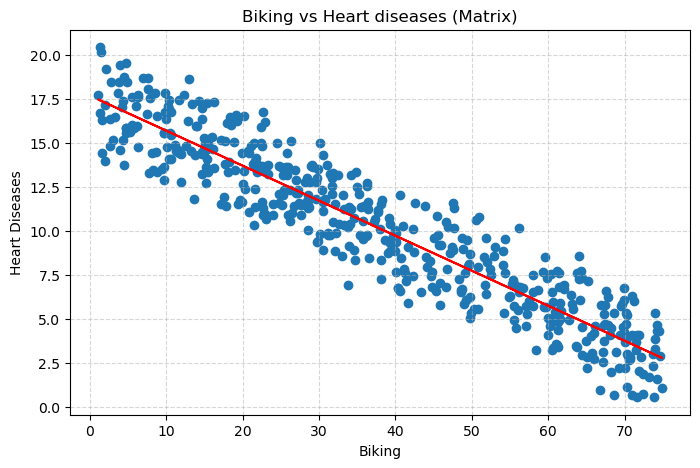

In [131]:
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.plot(x, predicted, color='red')
plt.xlabel('Biking')
plt.ylabel('Heart Diseases')
plt.title('Biking vs Heart diseases (Matrix)')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

- Similarly, plot is showing downwar trend as above. 

#### 5.8 RESIDUAL PLOT

In [132]:
#residual 
residual = predicted - y

In [133]:
residual[:5]

array([-0.20380045,  1.8771386 ,  0.12992858,  1.96190539, -0.1869447 ])

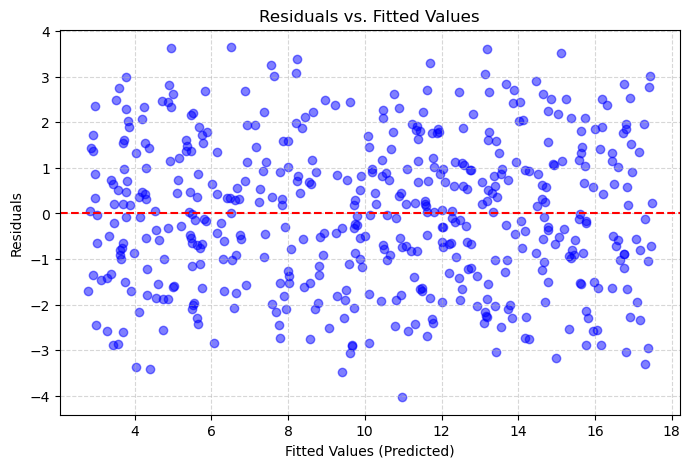

In [134]:
plt.figure(figsize=(8,5))
plt.scatter(predicted, residuals, color="blue", alpha=0.5)
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.axhline(0, color='red', ls='--')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

- The residual plot, which is a graphical representation of the differences between the observed values and the values predicted by the regression model, provides valuable insights into the distribution of errors. In this context, the absence of heteroscedasticity is a positive observation. 

- Heteroscedasticity refers to a situation where the variability of the errors, or residuals, is not constant across the range of the independent variable. When heteroscedasticity is present, it can lead to issues such as biased parameter estimates and unreliable statistical inferences.

- In our analysis, the residual plot shows a consistent and relatively uniform spread of residuals as we move along the independent variable. This uniformity implies that the variance of the errors remains fairly constant, which is a desirable characteristic for a regression model. It indicates that the model's predictions are equally accurate across the range of the independent variable, and no specific pattern or trend in the residuals' variability is apparent.

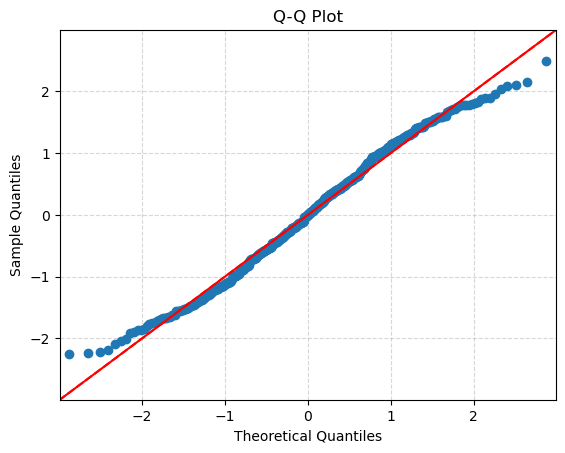

In [135]:
#normal distribution to the residuals
mu, std = stats.norm.fit(residual)
#residual Q-Q plot
fig = sm.qqplot(residual, line='45', fit=True)
plt.title('Q-Q Plot')
plt.plot([np.min(residual), np.max(residual)], [np.min(residual), np.max(residual)], color='red', linestyle='--')
plt.grid(True, ls='--', alpha=0.5)
plt.show()

- The residual plot, which is a graphical representation of the differences between the observed values and the values predicted by the regression model, provides valuable insights into the distribution of errors. In this context, the absence of heteroscedasticity is a positive observation. Heteroscedasticity refers to a situation where the variability of the errors, or residuals, is not constant across the range of the independent variable. When heteroscedasticity is present, it can lead to issues such as biased parameter estimates and unreliable statistical inferences.

- In our analysis, the residual plot shows a consistent and relatively uniform spread of residuals as we move along the independent variable. This uniformity implies that the variance of the errors remains fairly constant, which is a desirable characteristic for a regression model. It indicates that the model's predictions are equally accurate across the range of the independent variable, and no specific pattern or trend in the residuals' variability is apparent.

#### 5.9 R SQUARE

In [136]:
#calculate R-squared (R²)
y_mean = np.mean(y)
SST = np.sum((y - y_mean) ** 2)
SSR = np.sum((predicted - y_mean) ** 2)
r_squared = SSR / SST

In [137]:
print(f"R-squared (R²): {r_squared:.4f}")

R-squared (R²): 0.8751


- R-squared value of 87.51% indicates that the regression model accounts for 87.51% of the variation in the dependent variable.

#### 5.10 MEAN SQUARE ERROR 

In [138]:
#Mean Squared Error (MSE)
mse = np.mean((y - predicted) ** 2)

In [139]:
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 2.6059


- In your case, an MSE of 2.6059 means that, on average, the squared difference between the predicted values and the actual values in your dataset is 2.6059.

#### 5.11 ROOT MEAN SQUARE ERROR

In [140]:
#Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

In [141]:
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Root Mean Squared Error (RMSE): 1.6143


- RMSE of 1.6143 indicates that, on average, the square root of the squared differences between the predicted values and the actual values in your dataset is 1.6143.

#### 6. REFERENCES & CITATIONS

#### Books
- David A. Freedman (2009). *Statistical Models: Theory and Practice*. Cambridge University Press.
- Rencher, Alvin C.; Christensen, William F. (2012). *Methods of Multivariate Analysis*.

#### Journals
- Hilary L. Seal (1967). "The historical development of the Gauss linear model". *Biometrika*.
- Yan, Xin (2009). "Linear Regression Analysis: Theory and Computing".
- Hawkins, Douglas M. (1973). "On the Investigation of Alternative Regressions by Principal Component Analysis". *Journal of the Royal Statistical Society*.
- Jolliffe, Ian T. (1982). "A Note on the Use of Principal Components in Regression".

#### Papers
- Tibshirani, Robert (1996). "Regression Shrinkage and Selection via the Lasso".
- Efron, Bradley; Hastie, Trevor; Johnstone, Iain; Tibshirani, Robert (2004). "Least Angle Regression".
- Hawkins, Douglas M. (1973). "On the Investigation of Alternative Regressions by Principal Component Analysis".
- Berk, Richard A. (2007). "Regression Analysis: A Constructive Critique".
- Tsao, Min (2022). "Group least squares regression for linear models with strongly correlated predictor variables".

#### Historical References
- Galton, Francis (1886). "Regression Towards Mediocrity in Hereditary Stature".
- Theil, H. (1950). "A rank-invariant method of linear and polynomial regression analysis".

#### Websites and Online Sources
- "Linear Regression | University of California San Diego - KeepNotes".

#### Additional Information

- Linear regression is a fundamental topic in statistics, dating back to the work of Legendre and Gauss in the early 19th century. It has since evolved and found applications in various fields, including economics, biology, and machine learning.
- This Jupyter Notebook includes a list of references and citations related to linear regression, as well as additional reading materials for those interested in learning more about regression analysis.

#### Sources
- Cohen, J., Cohen P., West, S.G., & Aiken, L.S. (2003). *Applied multiple regression/correlation analysis for the behavioral sciences*.
- Draper, N.R.; Smith, H. (1998). *Applied Regression Analysis*.
- Francis Galton. "Regression Towards Mediocrity in Hereditary Stature," Journal of the Anthropological Institute, 15:246-263 (1886).
- Robert S. Pindyck and Daniel L. Rubinfeld (1998, 4th ed.). *Econometric Models and Economic Forecasts*.
